# Logic testing (will be deleted)

In [1]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *


In [2]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

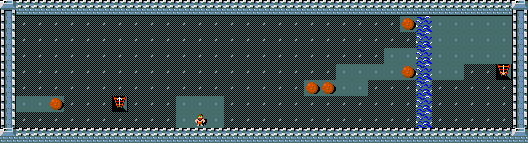

In [177]:
des_file = """
MAZE: "mylevel", ' '
FLAGS: premapped
GEOMETRY: center, center
MAP
|-------------------------------|
|.........................}.....|
|.........................}.....|
|.........................}.....|
|.........................}.....|
|.........................}.....|
|.........................}.....|
|.........................}.....|
|-------------------------------|
ENDMAP
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,25,07))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,25,07))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,25,07))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,25,07))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,25,07))
LADDER: rndcoord(fillrect(01,01,25,07)), up
LADDER: rndcoord(fillrect(31,01,31,07)), down
"""
render_des_file(des_file, n_images=1, full_screen=False)

## Creazione dell environment

In [ ]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

In [ ]:
state['chars'].shape, state['pixel'].shape

In [ ]:
plt.imshow(state['pixel'][100:250, 400:750]) #Immagine ristretta con range [y][x]

In [118]:
game_map = state['chars']
game = state['pixel']

In [ ]:
image = plt.imshow(game[25:300, :475])
prev_player_position = get_player_location(game_map)
player_positions = []
for action in [6,2,1]:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, :])
    player_positions.append(get_player_location(game_map))
    time.sleep(0.5)
    
    #pass_the_river(get_player_location(game_map), action, env)
    """
    if is_player_same_position(get_player_location(game_map), prev_player_position):
        print("Same position")
        result = avoid_the_obstacle(game_map, get_player_location(game_map), action, env)
        print(result)
        ""
            if result == 0:
                RICERCARE NUOVO PATH PER SPOSTARE BOULDER)
            elif result == 1:
                RICERCARE NUOVO PATH PER ARRIVARE ALLE SCALE (abbiamo superato il fiume)
            else:
                CASO RARO DOVE avoid_the_obstacle NO HA FATTO NIENTE oppure HA FALLITO oppure (in teoria impossibile)
        """
    
    prev_player_position = get_player_location(game_map)